### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 1. Import the necessary packages - 2.5 marks

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/rchinthaka/Project-Assignment/master/Data.csv")
item=pd.read_csv("https://raw.githubusercontent.com/rchinthaka/Project-Assignment/master/item.csv")
user=pd.read_csv("https://raw.githubusercontent.com/rchinthaka/Project-Assignment/master/user.csv")

data.head()
item.head()
user.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
data.shape
data.info()
data.describe()
data.isnull().sum()

item.shape
item.info()
item.describe()
item.isnull().sum()

user.shape
user.info()
user.describe()
user.isnull().sum()

(100000, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

(1681, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

(943, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

##### Observation: There is no any Null values in any of date sets out of three.

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [4]:
item.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

##### Observation: "Drama" is the highest released movie type 

#### 4. Find the number of movies per genre using the item data - 5 marks

In [5]:
item.loc[item.iloc[:, 3:].sum(axis=1)>1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


##### Observation: 849 Movies are having  more than one genre

#### 5. Find the movies that have more than one genre - 2.5 marks

In [6]:
item=item.drop(item[item.unknown == 1].index)
item.sum()


movie id                                                  1413763
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         0
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

##### Observation: Previously there was one Movie in Unknown catogory and above has zero Unknown after drop

#### 6. Drop the movie where the genre is unknown - 2.5 marks

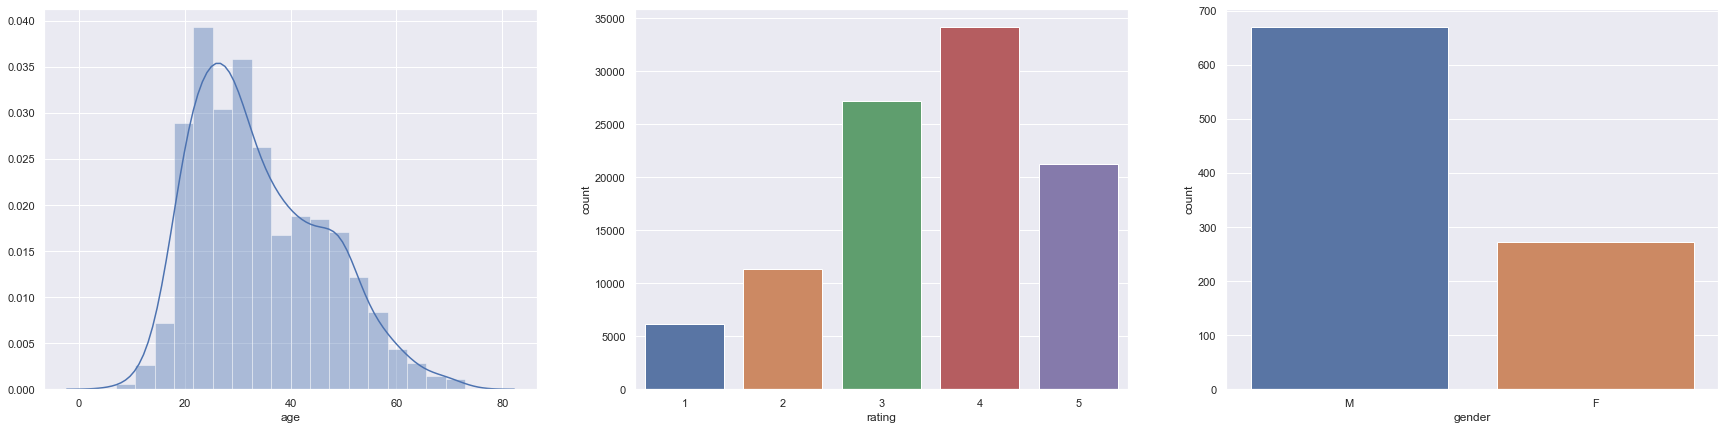

In [7]:

fig, axs = plt.subplots(ncols = 3, figsize = (30, 7))
sns.distplot(user['age'],ax=axs[0]);
sns.countplot(data['rating'],ax=axs[1]);
sns.countplot(user['gender'],ax=axs[2]);

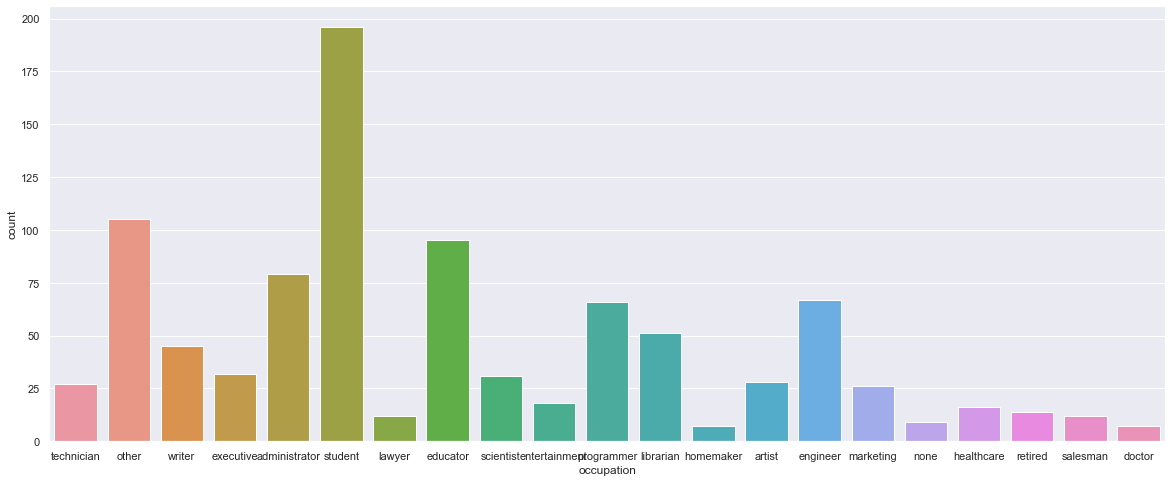

In [8]:
plt.figure(figsize=(20,8))
sns.countplot(user['occupation']);

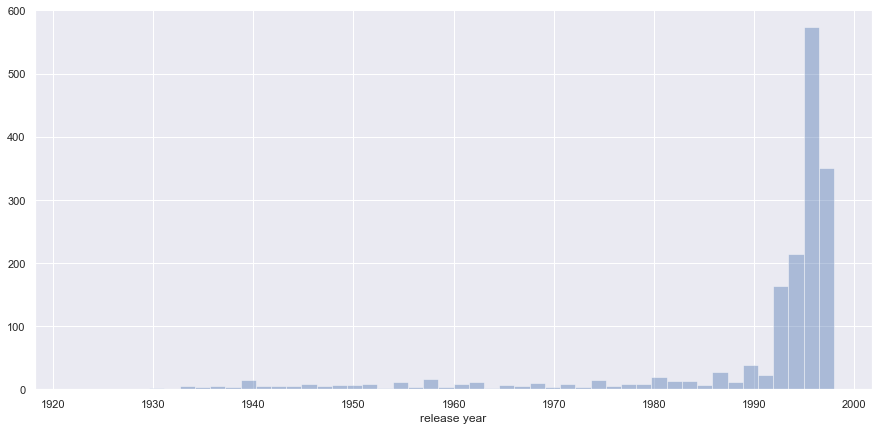

In [9]:
item=item.rename({'release date': 'release_date'}, axis=1)
item['release year'] = item.apply(lambda row: row.release_date.split('-')[2],axis = 1)
plt.figure(figsize=(15,7))
sns.distplot(item['release year'],kde=False);

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [48]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

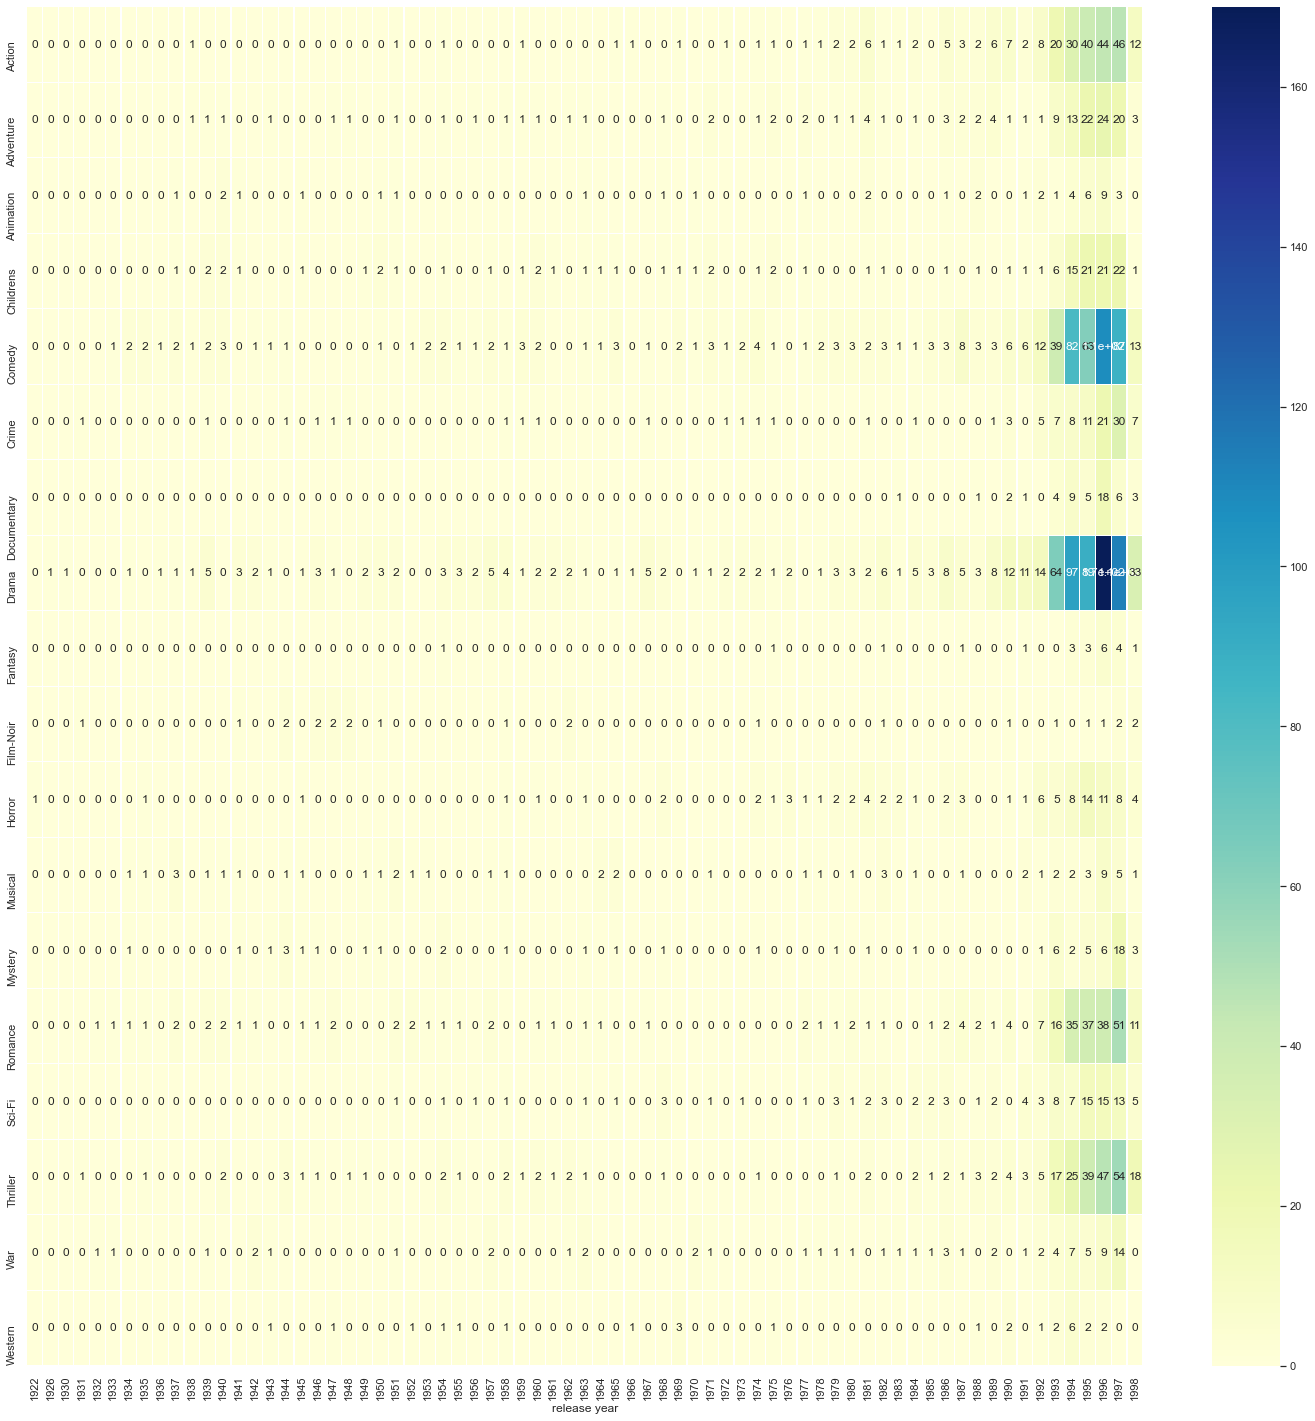

In [10]:
item_new=item.drop(item.columns[[0,1,2,3]], axis=1)
item_new.set_index('release year', inplace=True)
item_new.head()
plt.figure(figsize=(25,25))
sns.heatmap((item_new.groupby(['release year']).sum()).transpose(),cmap="YlGnBu",linewidths=.2,annot=True);


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [11]:
data_Modified=pd.merge(data.groupby(['movie id'])[['rating']].count(),data.groupby(['movie id'])[['rating']].sum(),on='movie id', how='inner')
data_Modified=data_Modified.rename({'rating_x': 'rating_count','rating_y': 'rating_sum'}, axis=1)
data_Modified=data_Modified[(data_Modified.rating_count > 100)]
item_merge = pd.merge(item, data_Modified, on='movie id', how='inner')
item_merge['avg_rating'] = item_merge.apply(lambda row: (row.rating_sum/row.rating_count),axis = 1)
item_merge.head()

,movie id,movie title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year,rating_count,rating_sum,avg_rating
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1995,452,1753,3.878319
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1995,131,420,3.206107
2,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1995,209,742,3.550239
3,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1995,392,1489,3.798469
4,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1995,219,875,3.995434


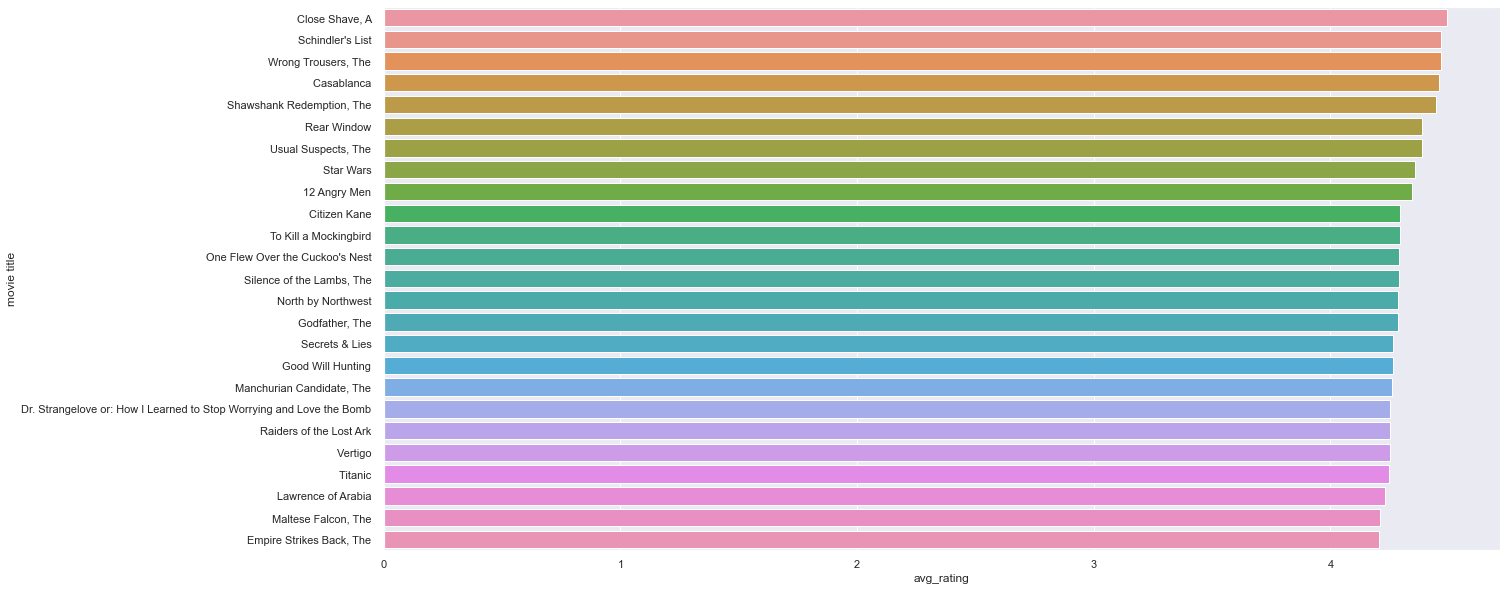

In [12]:
item_merge=item_merge.sort_values(by=['avg_rating'],ascending=False).head(25)
plt.figure(figsize=(20,10))
sns.barplot(data=item_merge,y='movie title',x='avg_rating');


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [13]:
df_temp=pd.merge(user[['user id','gender']],data[['user id','movie id','rating']],on='user id', how='inner' )
data_user=df_temp.groupby(['movie id','gender'])[['rating']].sum()
data_user=data_user.unstack()
data_user.head()

rating        
gender        F       M
movie id               
1         451.0  1302.0
2          64.0   356.0
3          43.0   230.0
4         153.0   589.0
5          83.0   201.0

In [14]:
item.head()

,movie id,movie title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [15]:
item_user_data=pd.merge(item,data_user,on='movie id', how='inner' )

c:\program files\python38\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [16]:
item_user_data.head()

,movie id,movie title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year,"(rating, F)","(rating, M)"
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1995,451.0,1302.0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1995,64.0,356.0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,43.0,230.0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1995,153.0,589.0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1995,83.0,201.0


In [17]:
mapping = {item_user_data.columns[23]:'female_rating', item_user_data.columns[24]:'male_rating'}
item_user_data=item_user_data.rename(columns=mapping)

In [18]:
item_user_data.head()

,movie id,movie title,release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year,female_rating,male_rating
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1995,451.0,1302.0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1995,64.0,356.0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,43.0,230.0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1995,153.0,589.0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1995,83.0,201.0


In [19]:
Drama_piv=item_user_data.pivot(columns='Drama',values=['female_rating','male_rating']).sum().unstack()
Drama_piv['%']=(Drama_piv[1]/Drama_piv.sum().sum())*100
Drama_piv

Drama,0,1,%
female_rating,50580.0,40314.0,11.421885
male_rating,155266.0,106794.0,30.257201


In [20]:

Sci_Fi_piv=item_user_data.pivot(columns='Sci-Fi',values=['female_rating','male_rating']).sum().unstack()
Sci_Fi_piv['%']=(Sci_Fi_piv[1]/Sci_Fi_piv.sum().sum())*100
Sci_Fi_piv

Sci-Fi,0,1,%
female_rating,81698.0,9196.0,2.605439
male_rating,225928.0,36132.0,10.237028


In [21]:

Romance_piv=item_user_data.pivot(columns='Romance',values=['female_rating','male_rating']).sum().unstack()
Romance_piv['%']=(Romance_piv[1]/Romance_piv.sum().sum())*100
Romance_piv

Romance,0,1,%
female_rating,69479.0,21415.0,6.067363
male_rating,212993.0,49067.0,13.901812


#### Conclusion:
##### Men watch more drama than women
##### Men watch more Sci-Fi than women
##### Men Watch more Romance than women
